In [1]:
#importing packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation
from scipy.misc import derivative
import numpy as np
import astropy.units as u
from astropy.table import Table
from astropy import constants as const
import pandas as pd
import sympy as sp
import decimal
import seaborn as sns
decimal.getcontext().prec = 100
import scipy as sci
from scipy import integrate

$$
    % These colors are friendly to colorblind.
    %\newcommand{\red}[1]{{\color{red}#1}}
    %\newcommand{\green}[1]{{\color{green}#1}}
    %\newcommand{\blue}[1]{{\color{blue}#1}}
    %\newcommand{\cyan}[1]{{\color{cyan}#1}}
    %\newcommand{\magenta}[1]{{\color{magenta}#1}}
    %\newcommand{\yellow}[1]{{\color{yellow}#1}}
    %\newcommand{\orange}[1]{{\color{orange}#1}}
    \newcommand{\mysquare}[1]{#1^2}
    \newcommand{\df}{\text{d}}
    \newcommand{\Df}{\mathcal{D}}
    \newcommand{\Lag}{\mathcal{L}}
    \newcommand{\bp}{\begin{pmatrix}}
    \newcommand{\ep}{\end{pmatrix}}
    \newcommand{\bb}{\begin{bmatrix}}
    \newcommand{\eb}{\end{bmatrix}}
    \newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
    \newcommand{\pmat}[1]{\begin{pmatrix}#1\end{pmatrix}}
    \newcommand{\vmat}[1]{\begin{vmatrix}#1\end{vmatrix}}
    \newcommand{\diag}{diag}
    \newcommand{\tr}{\text{Tr}}
    \newcommand{\PLC}{PLC}
    \renewcommand{\argmin}{arg\,min}
    \renewcommand{\argmax}{arg\,max}
    \newcommand{\sign}{sign}
    \newcommand{\arccosh}{arccosh}
    \newcommand{\re}{Re}
    \newcommand{\im}{Im}
    \newcommand{\grad}{grad}
    \newcommand{\divergence}{div}
    \newcommand{\rot}{rot}
    \newcommand{\curl}{curl}
    \newcommand{\Res}{Res}
    \newcommand{\bs}[1]{{\boldsymbol{#1}}}
    \newcommand{\bh}[1]{\hat{\boldsymbol{#1}}}
    \newcommand{\bv}[1]{\overrightarrow{\boldsymbol{#1}}}
    \newcommand{\al}[1]{\begin{align}#1\end{align}}
    \newcommand{\als}[1]{\begin{align*}#1\end{align*}}
    \newcommand{\ol}{\overline}
    \newcommand{\ul}{\protect\underline}
    \newcommand{\ab}[1]{\left|#1\right|}
    \newcommand{\abb}[1]{\left\|#1\right\|}
    \newcommand{\paren}[1]{\left(#1\right)}
    \newcommand{\pn}[1]{\left(#1\right)}
    \newcommand{\sparen}[1]{(#1)} % small parentheses
    \newcommand{\sqbr}[1]{\left[#1\right]}
    \newcommand{\br}[1]{\left\{#1\right\}} % brace
    \newcommand{\fn}[1]{\!\paren{#1}} % function
    \newcommand{\Ab}[1]{\bigl|#1\bigr|}
    \newcommand{\Abb}[1]{\bigl\|#1\bigr\|}
    \newcommand{\Paren}[1]{\bigl(#1\bigr)}
    \newcommand{\Pn}[1]{\bigl(#1\bigr)}
    \newcommand{\Sqbr}[1]{\bigl[#1\bigr]}
    \newcommand{\Br}[1]{\bigl\{#1\bigr\}} % brace
    \newcommand{\Fn}[1]{\!\Pn{#1}} % function
    \newcommand{\wt}{\widetilde}
    \newcommand{\nn}{\nonumber\\}
    \newcommand{\n}{\nonumber}
    \newcommand{\B}{\ensuremath{\bs B}}
    \newcommand{\E}{\ensuremath{\bs E}}
    \newcommand{\A}{\ensuremath{\bs A}}
    \newcommand{\nab}{\bs\nabla}
    \newcommand{\Lap}{\nabla^2}
    \newcommand{\p}{\partial}
    \newcommand{\Done}{{\color{red}\bf Done!}}
    \newcommand{\sr}{\stackrel}
    \newcommand{\us}{\underset}
    \newcommand{\er}{\eqref}
    \newcommand{\ds}{\displaystyle}
    \newcommand{\ov}{\over}
    \newcommand{\L}{\textsf{L}}
    \newcommand{\M}{\textsf{M}}
    \renewcommand{\N}{\textsf{N}}
    \newcommand{\commutator}[2]{\left[#1,\,#2\right]}
    \newcommand{\tf}{\textsf}
    \newcommand{\tl}{\textsl}
    \newcommand{\tm}{\textrm}
    \newcommand{\mc}{\mathcal}
    \newcommand{\ms}{\mathscr}
    \newcommand{\lv}[1]{\overrightarrow{#1}}
    \newcommand{\Id}{Id}
    \renewcommand{\nab}{\bs\nabla}
    \newcommand{\refname}{参考文献}
    \newcommand{\tauP}{\tau_\text{P}}
    \newcommand{\xP}{x_\text{P}}
    \renewcommand{\P}{\text{P}}
    \newcommand{\tx}[1]{\text{#1}}
    \newcommand{\pr}{\prime}
$$

In [912]:
slice = 1e5
end = (slice / 1e2)
slice = int(slice)

x = np.linspace(0, end, slice)
y1 = np.linspace(1, 50, slice)
y1[0] = 1e-2
y2 = np.linspace(1, 50, slice)
y2[0] = 0
y3 = np.linspace(1, 50, slice)
y3[0] = -1e5
y4 = np.linspace(1, 50, slice)
y4[0] = 0

ma = 1e-12 * u.eV
a = (4 * np.pi * const.G.cgs * ((ma / (const.hbar * const.c)).cgs)**2).value
a
for i in range(slice - 1):
    k1 = (a * (2 * y1[i]**2) + (2 * y3[i]**2 /y1[i]) + (3 * y2[i]**4 / y1[i]**3) + (3 * y4[i] * y2[i] / y1[i]) - (7 * y2[i]**2 * y3[i]/ y1[i]**2)) * (x[i+1] - x[i])
    l1 = y4[i] * (x[i+1] - x[i])
    n1 = y3[i] * (x[i+1] - x[i])
    m1 = y2[i] * (x[i+1] - x[i])

    k2 = (a * (2 * (y1[i] + (m1 / 2))**2) + (2 * (y3[i] + (l1 / 2))**2 /(y1[i] + (m1 / 2))) + (3 * (y2[i] + (n1 / 2))**4 / (y1[i] + (m1 / 2))**3) + (3 * (y4[i] + (k1 / 2)) * (y2[i] + (n1 / 2)) / (y1[i] + (m1 / 2))) - (7 * (y2[i] + (n1 / 2))**2 * (y3[i] + (l1 / 2))/ (y1[i] + (m1 / 2))**2)) * (x[i+1] - x[i])
    l2 = (y4[i] + (k1 / 2)) * (x[i+1] - x[i])
    n2 = (y2[i] + (l1 / 2)) * (x[i+1] - x[i])
    m2 = (y3[i] + (m1 / 2)) * (x[i+1] - x[i])

    k3 = (a * (2 * (y1[i] + (m2 / 2))**2) + (2 * (y3[i] + (l2 / 2))**2 /(y1[i] + (m2 / 2))) + (3 * (y2[i] + (n2 / 2))**4 / (y1[i] + (m2 / 2))**3) + (3 * (y4[i] + (k2 / 2)) * (y2[i] + (n2 / 2)) / (y1[i] + (m2 / 2))) - (7 * (y2[i] + (n2 / 2))**2 * (y3[i] + (l2 / 2))/ (y1[i] + (m2 / 2))**2)) * (x[i+1] - x[i])
    l3 = (y4[i] + (k2 / 2)) * (x[i+1] - x[i])
    n3 = (y2[i] + (l2 / 2)) * (x[i+1] - x[i])
    m3 = (y3[i] + (m2 / 2)) * (x[i+1] - x[i])

    k4 = (a * (2 * (y1[i] + (m3))**2) + (2 * (y3[i] + (l3))**2 /(y1[i] + (m3))) + (3 * (y2[i] + (n3))**4 / (y1[i] + (m3))**3) + (3 * (y4[i] + (k3)) * (y2[i] + (n3)) / (y1[i] + (m3))) - (7 * (y2[i] + (n3))**2 * (y3[i] + (l3))/ (y1[i] + (m3))**2)) * (x[i+1] - x[i])
    l4 = (y4[i] + (k3)) * (x[i+1] - x[i])
    n4 = (y2[i] + (l3)) * (x[i+1] - x[i])
    m4 = (y3[i] + (m3)) * (x[i+1] - x[i])

    y4[i + 1] = y4[i] + (k1 + k2 + k3 + k4) / 6
    y3[i + 1] = y3[i] + (l1 + l2 + l3 + l4) / 6
    y2[i + 1] = y2[i] + (n1 + n2 + n3 + n4) / 6
    y1[i + 1] = y1[i] + (m1 + m2 + m3 + m4) / 6

<ipython-input-912-e02a27ab3027>:34: RuntimeWarning: overflow encountered in double_scalars
  k4 = (a * (2 * (y1[i] + (m3))**2) + (2 * (y3[i] + (l3))**2 /(y1[i] + (m3))) + (3 * (y2[i] + (n3))**4 / (y1[i] + (m3))**3) + (3 * (y4[i] + (k3)) * (y2[i] + (n3)) / (y1[i] + (m3))) - (7 * (y2[i] + (n3))**2 * (y3[i] + (l3))/ (y1[i] + (m3))**2)) * (x[i+1] - x[i])
<ipython-input-912-e02a27ab3027>:19: RuntimeWarning: overflow encountered in double_scalars
  k1 = (a * (2 * y1[i]**2) + (2 * y3[i]**2 /y1[i]) + (3 * y2[i]**4 / y1[i]**3) + (3 * y4[i] * y2[i] / y1[i]) - (7 * y2[i]**2 * y3[i]/ y1[i]**2)) * (x[i+1] - x[i])
<ipython-input-912-e02a27ab3027>:19: RuntimeWarning: invalid value encountered in double_scalars
  k1 = (a * (2 * y1[i]**2) + (2 * y3[i]**2 /y1[i]) + (3 * y2[i]**4 / y1[i]**3) + (3 * y4[i] * y2[i] / y1[i]) - (7 * y2[i]**2 * y3[i]/ y1[i]**2)) * (x[i+1] - x[i])
<ipython-input-912-e02a27ab3027>:24: RuntimeWarning: overflow encountered in double_scalars
  k2 = (a * (2 * (y1[i] + (m1 / 2))**2)

In [8]:
slice = 1e5
end = np.log10(slice / 1e2)
slice = int(slice)

x = np.logspace(0, end, slice)
y1 = np.linspace(1, 50, slice)
y1[0] = 1e5
y2 = np.linspace(1, 50, slice)
y2[0] = 0
y3 = np.linspace(1, 50, slice)
y3[0] = -1e-12
y4 = np.linspace(1, 50, slice)
y4[0] = 0

ma = 1e-12 * u.eV
a = (4 * np.pi * const.G.cgs * ((ma / (const.hbar * const.c)).cgs)**2).value
a
for i in range(slice - 1):
    k1 = ((2 * a * y1[i]**2) + (3 * y2[i]**4 / y1[i]**3) - (y2[i]**2 / (x[i] * y1[1]**2) * (6 * y2[i] + 7 * x[i] * y3[i])) - (4 * y4[i] / x[i]) + (1 / (x[i] * y1[i]) * (2 * x[i] * y3[i]**2 + y2[i] * (10 * y3[i] + 3 * x[i] * y4[i])))) * (x[i+1] - x[i])
    l1 = y4[i] * (x[i+1] - x[i])
    n1 = y3[i] * (x[i+1] - x[i])
    m1 = y2[i] * (x[i+1] - x[i])

    k2 = ((2 * a * ((y1[i] + m1 / 2))**2) + (3 * (y2[i] + n1 / 2)**4 / ((y1[i] + m1 / 2))**3) - ((y2[i] + n1 / 2)**2 / ((x[i] + (x[i+1] - x[i]) / 2) * ((y1[1] + m1 / 2))**2) * (6 * (y2[i] + n1 / 2) + 7 * (x[i] + (x[i+1] - x[i]) / 2) * (y3[i] + l1 / 2))) - (4 * (y4[i] + k1 / 2) / (x[i] + (x[i+1] - x[i]) / 2)) + (1 / ((x[i] + (x[i+1] - x[i]) / 2) * ((y1[i] + m1 / 2))) * (2 * (x[i] + (x[i+1] - x[i]) / 2) * (y3[i] + l1 / 2)**2 + (y2[i] + n1 / 2) * (10 * (y3[i] + l1 / 2) + 3 * (x[i] + (x[i+1] - x[i]) / 2) * (y4[i] + k1 / 2))))) * (x[i+1] - x[i])
    l2 = (y4[i] + (k1 / 2)) * (x[i+1] - x[i])
    n2 = (y2[i] + (l1 / 2)) * (x[i+1] - x[i])
    m2 = (y3[i] + (m1 / 2)) * (x[i+1] - x[i])

    k3 = ((2 * a * ((y1[i] + m2 / 2))**2) + (3 * (y2[i] + n2 / 2)**4 / ((y1[i] + m2 / 2))**3) - ((y2[i] + n2 / 2)**2 / ((x[i] + (x[i+1] - x[i]) / 2) * ((y1[1] + m2 / 2))**2) * (6 * (y2[i] + n2 / 2) + 7 * (x[i] + (x[i+1] - x[i]) / 2) * (y3[i] + l2 / 2))) - (4 * (y4[i] + k2 / 2) / (x[i] + (x[i+1] - x[i]) / 2)) + (1 / ((x[i] + (x[i+1] - x[i]) / 2) * ((y1[i] + m2 / 2))) * (2 * (x[i] + (x[i+1] - x[i]) / 2) * (y3[i] + l2 / 2)**2 + (y2[i] + n2 / 2) * (10 * (y3[i] + l2 / 2) + 3 * (x[i] + (x[i+1] - x[i]) / 2) * (y4[i] + k2 / 2))))) * (x[i+1] - x[i])
    l3 = (y4[i] + (k2 / 2)) * (x[i+1] - x[i])
    n3 = (y2[i] + (l2 / 2)) * (x[i+1] - x[i])
    m3 = (y3[i] + (m2 / 2)) * (x[i+1] - x[i])

    k4 = ((2 * a * ((y1[i] + m3))**2) + (3 * (y2[i] + n3)**4 / ((y1[i] + m3))**3) - ((y2[i] + n3)**2 / ((x[i] + (x[i+1] - x[i])) * ((y1[1] + m3))**2) * (6 * (y2[i] + n3) + 7 * (x[i] + (x[i+1] - x[i])) * (y3[i] + l3))) - (4 * (y4[i] + k3) / (x[i] + (x[i+1] - x[i]))) + (1 / ((x[i] + (x[i+1] - x[i])) * ((y1[i] + m3))) * (2 * (x[i] + (x[i+1] - x[i])) * (y3[i] + l3)**2 + (y2[i] + n3) * (10 * (y3[i] + l3) + 3 * (x[i] + (x[i+1] - x[i])) * (y4[i] + k3))))) * (x[i+1] - x[i])
    l4 = (y4[i] + (k3)) * (x[i+1] - x[i])
    n4 = (y2[i] + (l3)) * (x[i+1] - x[i])
    m4 = (y3[i] + (m3)) * (x[i+1] - x[i])

    y4[i + 1] = y4[i] + (k1 + k2 + k3 + k4) / 6
    y3[i + 1] = y3[i] + (l1 + l2 + l3 + l4) / 6
    y2[i + 1] = y2[i] + (n1 + n2 + n3 + n4) / 6
    y1[i + 1] = y1[i] + (m1 + m2 + m3 + m4) / 6

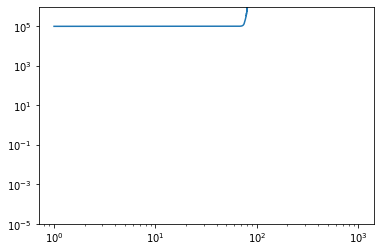

In [9]:
plt.plot(x, y1)
#plt.xlim(1, 8)
plt.ylim(1e-5, y1[0] * 10)
plt.yscale('log')
plt.xscale('log')

In [861]:
z = x**2 * y1

In [862]:
N = 1e12 * const.M_sun.cgs.value / (4 * np.pi * integrate.simpson(z, x))

In [863]:
rho = N * y1

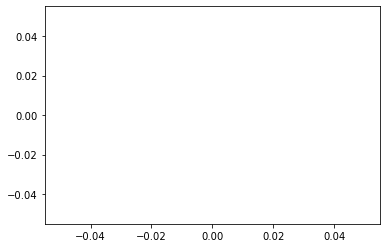

In [864]:
plt.plot(x, rho)

$$
\al{
    m{v_c\fn{R}^2\ov R} &= G{mM\fn{R}\ov R^2}\nn
    &= G{m\ov R^2}\pn{4\pi\int_0^R \df r\ r^2\rho\fn{r}}
}
$$
Hence rotation velocity is given by
$$
\al{
    {v_c\fn{R}} = \sqrt{{4\pi G\ov R}{\int_0^R \df r\ r^2\rho\fn{r}}}
}
$$

In [865]:
def Vrot(R):
    result = 4 * np.pi * const.G.cgs.value
    result /= x[R+2]
    Rlist = x[0:R+2]
    rholist = rho[0:R+2]
    integral = integrate.simpson(Rlist**2 * rholist, Rlist)
    return np.sqrt(result * integral)

In [866]:
rotVel = np.ndarray(slice - 2)
for i in range(slice - 2):
    rotVel[i] = Vrot(i)

KeyboardInterrupt: 

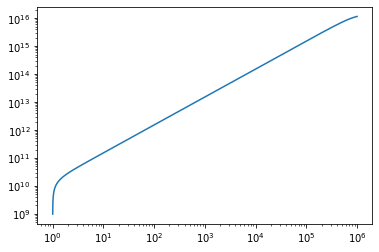

In [ ]:
plt.plot(x[1:slice - 1], rotVel)
plt.yscale('log')
plt.xscale('log')

In [ ]:
x = np.linspace(1, 1000, 10000)
y1 = np.linspace(1, 50, 10000)
y1[0] = 1e-11
y2 = np.linspace(1, 50, 10000)
y2[0] = 0

In [ ]:
for i in range(9999):
    y2[i + 1] = y2[i] - (2/x[i] * y2[i] + (y1[i])**2) * (x[i+1] - x[i])
    y1[i + 1] = y1[i] + y2[i] * (x[i+1] - x[i])

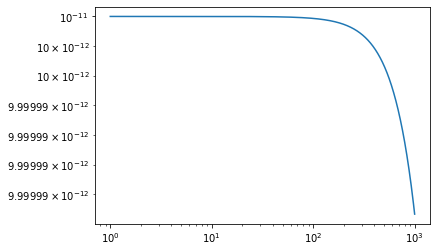

In [ ]:
plt.plot(x, y1)
plt.yscale('log')
plt.xscale('log')

In [ ]:
z = x**2 * y1

In [ ]:
N = 1e12 * const.M_sun.cgs.value / (4 * np.pi * integrate.simpson(z, x))

In [ ]:
rho = N * y1

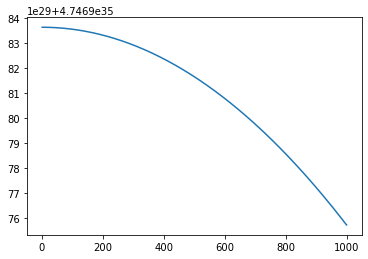

In [ ]:
plt.plot(x, rho)

In [ ]:
def Vrot(R):
    result = 4 * np.pi * const.G.cgs.value
    result /= x[R+2]
    Rlist = x[0:R+2]
    rholist = rho[0:R+2]
    integral = integrate.simpson(Rlist**2 * rholist, Rlist)
    return np.sqrt(result * integral)

In [ ]:
rotVel = np.ndarray(10000 - 2)
for i in range(10000 - 2):
    rotVel[i] = Vrot(i)

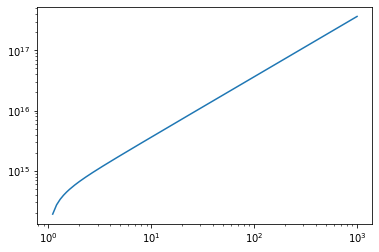

In [ ]:
plt.plot(x[1:10000 - 1], rotVel)
plt.yscale('log')
plt.xscale('log')